# 1. 体检数据中的假设检验问题

如果test statistic的值大于临界值，我们通常会拒绝原假设。
p-value是一个概率值，表示在原假设下，样本数据中出现观测值或更极端值的概率。

In [190]:
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 正态检验
from scipy.stats import shapiro, normaltest
# 单总体 T 检验
from scipy.stats import ttest_1samp

## 1.1 读取数据

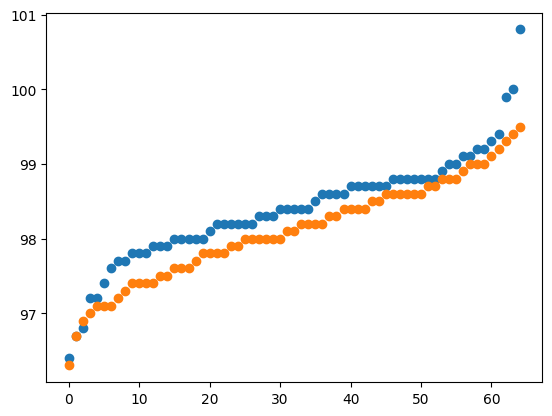

In [191]:
data = pd.read_csv('normtemp.txt', sep='\s+', names=['Temperature', 'Gender', 'HeartRate'])

all_temp = data['Temperature']
female_temp = data['Temperature'][data.Gender == 2]
male_temp = data['Temperature'][data.Gender == 1]

plt.scatter(np.arange(len(female_temp)), female_temp)
plt.scatter(np.arange(len(male_temp)), male_temp)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  3.,  2.,  6.,  6.,  6.,
        10., 16., 13., 14., 13., 18.,  7.,  6.,  4.,  1.,  0.]),
 array([95. , 95.2, 95.4, 95.6, 95.8, 96. , 96.2, 96.4, 96.6, 96.8, 97. ,
        97.2, 97.4, 97.6, 97.8, 98. , 98.2, 98.4, 98.6, 98.8, 99. , 99.2,
        99.4, 99.6, 99.8]),
 <BarContainer object of 24 artists>)

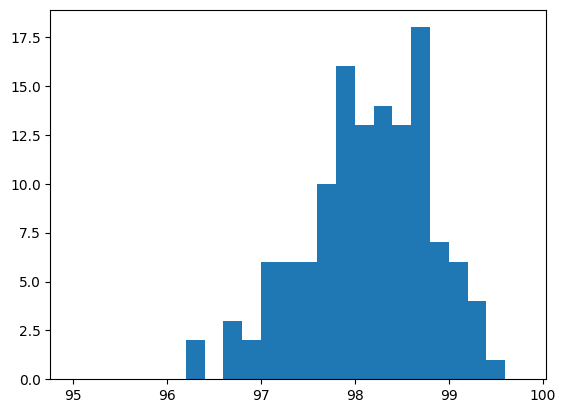

In [192]:
plt.hist(all_temp, bins=np.arange(95, 100, step=0.2))

## 1.2 正态性检验

In [193]:
shapiro(all_temp), normaltest(all_temp)

(ShapiroResult(statistic=0.9865768551826477, pvalue=0.2331615388393402),
 NormaltestResult(statistic=2.703801433319236, pvalue=0.2587479863488212))

## 1.3 单总体 T 检验

TtestResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07, df=129)

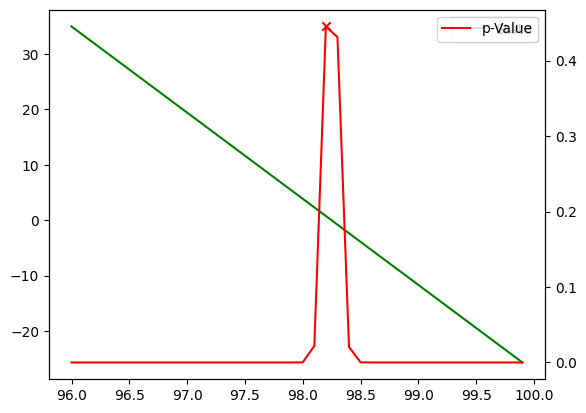

In [194]:
mu = 98.6

mus = np.arange(96, 100, 0.1)
tests_stats = [ttest_1samp(all_temp, mu).statistic for mu in mus]
tests_p_values = [ttest_1samp(all_temp, mu).pvalue for mu in mus]

_, ax = plt.subplots() # type: plt.Axes

ax.plot(mus, tests_stats, 'g', label='State')
n_ax = ax.twinx() # type: plt.Axes
n_ax.plot(mus, tests_p_values, 'r', label='p-Value')

n_ax.scatter(98.2, ttest_1samp(all_temp, 98.2).pvalue, color='r', marker='x')

ax.legend()
n_ax.legend()

ttest_1samp(all_temp, mu)

## 1.4 两独立样本 T 检验

H0: 没有差异，H1: 有差异

0.023 < 0.05 有 95% 概率拒绝原假设，即：拒绝没有差异

In [195]:
from scipy.stats import ttest_ind

ttest_ind(female_temp, male_temp)

TtestResult(statistic=2.2854345381654984, pvalue=0.023931883122402346, df=128.0)

# 2. 种族对求职的影响

## 2.1 读数据，提取数据

In [196]:
from pandas.io.stata import read_stata
from scipy.stats import chisquare

data = read_stata('us_job_market_discrimination.dta') # type: pd.DataFrame

ret = data[['race', 'call']].groupby(['race', 'call']).value_counts().unstack() # type: pd.DataFrame

expect = ret.mean(axis=0).values.reshape(-1, 1).repeat(2, axis=1).T

## 2.2 计算理论值

## 2.3 计算卡方检验

In [198]:
ret_flat = ret.to_numpy().reshape(-1, 1).astype(float)
expect_flat = expect.reshape(-1, 1)

chisquare(f_obs=ret_flat, f_exp=expect_flat)

Power_divergenceResult(statistic=array([16.87905041]), pvalue=array([0.0007484]))